# title: Hopfield-network-and-asociated-memory v2
## date: 2022-08-05
## author: Mei Ian Sam
## affiliation: Department of Physics, National Tsing Hua University

### updated version for 2022

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#digits:: the fundametal memory
#training data

zero = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 1, 1, 1, 1, 0, 0, 0],[0, 0, 1, 1, 1, 1, 1, 1, 0, 0],[0, 0, 1, 1, 0, 0, 1, 1, 0, 0],[0, 1, 1, 0, 0, 0, 0, 1, 1, 0],[0, 1, 1, 0, 0, 0, 0, 1, 1, 0],[0, 1, 1, 1, 0, 0, 1, 1, 1, 0],[0, 0, 1, 1, 1, 1, 1, 1, 0, 0],[0, 0, 0, 1, 1, 1, 1, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
one = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 1, 1, 0, 0, 0],[0, 0, 0, 0, 1, 1, 1, 0, 0, 0],[0, 0, 0, 1, 1, 1, 1, 0, 0, 0],[0, 0, 0, 0, 1, 1, 1, 0, 0, 0],[0, 0, 0, 0, 1, 1, 1, 0, 0, 0],[0, 0, 0, 0, 1, 1, 1, 0, 0, 0],[0, 0, 0, 0, 1, 1, 1, 0, 0, 0],[0, 0, 0, 0, 1, 1, 1, 0, 0, 0],[0, 0, 0, 0, 1, 1, 1, 0, 0, 0]]
two = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 1, 1, 1, 1, 0, 0, 0],[0, 0, 1, 1, 1, 1, 1, 1, 0, 0],[0, 1, 1, 0, 0, 0, 1, 1, 1, 0],[0, 1, 1, 0, 0, 0, 0, 1, 1, 0],[0, 0, 0, 0, 0, 0, 0, 1, 1, 0],[0, 0, 0, 0, 0, 0, 1, 1, 0, 0],[0, 0, 0, 0, 1, 1, 1, 0, 0, 0],[0, 1, 1, 1, 1, 1, 1, 1, 1, 1],[0, 1, 1, 1, 1, 1, 1, 1, 1, 1]]
three = [[0, 1, 1, 1, 1, 1, 1, 1, 1, 0],[0, 1, 1, 1, 1, 1, 1, 1, 0, 0],[0, 0, 0, 0, 1, 1, 1, 0, 0, 0],[0, 0, 0, 0, 1, 1, 0, 0, 0, 0],[0, 0, 0, 1, 1, 1, 0, 0, 0, 0],[0, 0, 0, 0, 1, 1, 1, 1, 1, 0],[0, 0, 0, 0, 0, 0, 0, 1, 1, 1],[0, 0, 1, 0, 0, 0, 1, 1, 1, 0],[0, 1, 1, 1, 1, 1, 1, 1, 0, 0],[0, 0, 1, 1, 1, 1, 1, 0, 0, 0]]
four = [[0, 0, 0, 0, 0, 1, 1, 0, 0, 0],[0, 0, 0, 0, 1, 1, 1, 0, 0, 0],[0, 0, 0, 1, 1, 1, 1, 0, 0, 0],[0, 0, 1, 1, 0, 1, 1, 0, 0, 0],[0, 1, 1, 0, 0, 1, 1, 0, 0, 0],[1, 1, 0, 0, 0, 1, 1, 0, 0, 0],[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],[0, 0, 0, 0, 0, 1, 1, 0, 0, 0],[0, 0, 0, 0, 0, 1, 1, 0, 0, 0]]
five = [[1, 1, 1, 1, 1, 1, 1, 1, 1, 0],[1, 1, 1, 1, 1, 1, 1, 1, 1, 0],[1, 1, 0, 0, 0, 0, 0, 0, 0, 0],[1, 1, 0, 0, 0, 0, 0, 0, 0, 0],[1, 1, 1, 1, 1, 1, 1, 1, 0, 0],[0, 1, 1, 1, 1, 1, 1, 1, 1, 0],[0, 0, 0, 0, 0, 0, 0, 1, 1, 1],[0, 1, 1, 0, 0, 0, 0, 1, 1, 0],[0, 1, 1, 1, 1, 1, 1, 1, 0, 0],[0, 0, 1, 1, 1, 1, 1, 0, 0, 0]]
six = [[0, 0, 0, 1, 1, 1, 1, 0, 0, 0],[0, 0, 1, 1, 1, 1, 1, 1, 0, 0],[0, 1, 1, 0, 0, 0, 1, 1, 0, 0],[0, 1, 1, 0, 0, 0, 1, 1, 0, 0],[1, 1, 0, 0, 0, 0, 0, 0, 0, 0],[1, 1, 1, 1, 1, 1, 1, 1, 0, 0],[0, 1, 1, 1, 1, 1, 1, 1, 1, 0],[0, 1, 1, 0, 0, 0, 1, 1, 1, 0],[0, 0, 1, 1, 1, 1, 1, 1, 0, 0],[0, 0, 0, 1, 1, 1, 1, 0, 0, 0]]
seven = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],[0, 1, 1, 1, 1, 1, 1, 1, 1, 0],[0, 1, 1, 1, 1, 1, 1, 1, 1, 0],[0, 0, 0, 0, 0, 0, 1, 1, 0, 0],[0, 0, 0, 0, 0, 0, 1, 1, 0, 0],[0, 0, 0, 0, 0, 0, 1, 1, 0, 0],[0, 0, 0, 0, 0, 0, 1, 1, 0, 0],[0, 0, 0, 0, 0, 0, 1, 1, 0, 0],[0, 0, 0, 0, 0, 0, 1, 1, 0, 0],[0, 0, 0, 0, 0, 0, 1, 1, 0, 0]]
eight = [[0, 0, 0, 0, 1, 1, 0, 0, 0, 0],[0, 0, 0, 1, 1, 1, 1, 0, 0, 0],[0, 0, 1, 1, 1, 1, 1, 1, 0, 0],[0, 1, 1, 0, 0, 0, 1, 1, 0, 0],[0, 1, 1, 0, 0, 0, 0, 1, 1, 0],[0, 0, 1, 1, 1, 1, 1, 1, 0, 0],[0, 1, 1, 0, 0, 0, 0, 1, 1, 0],[0, 1, 1, 1, 0, 0, 1, 1, 1, 0],[0, 0, 1, 1, 1, 1, 1, 1, 0, 0],[0, 0, 0, 0, 1, 1, 0, 0, 0, 0]]
nine = [[0, 0, 0, 1, 1, 1, 0, 0, 0, 0],[0, 0, 0, 1, 1, 1, 1, 0, 0, 0],[0, 0, 1, 1, 0, 0, 1, 1, 0, 0],[0, 0, 1, 1, 0, 0, 1, 1, 0, 0],[0, 1, 1, 0, 0, 0, 0, 1, 1, 0],[0, 1, 1, 1, 0, 0, 0, 1, 1, 0],[0, 1, 1, 1, 1, 1, 1, 1, 1, 0],[0, 0, 1, 1, 1, 1, 1, 1, 0, 0],[0, 0, 0, 0, 0, 0, 1, 1, 0, 0],[0, 0, 0, 0, 0, 0, 1, 1, 0, 0]]

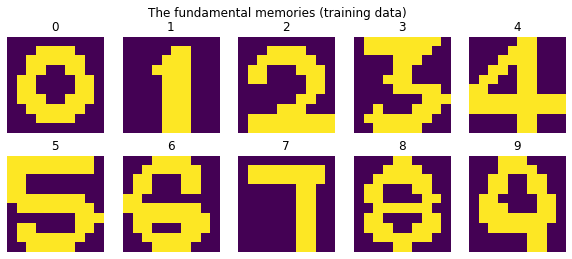

In [3]:
memories = [zero,one,two,three,four,five,six,seven,eight,nine] #you can change the training data
fig = plt.figure(figsize = (10,4))
plt.suptitle("The fundamental memories (training data)")
for i,number in enumerate(memories):
    plt.subplot(2,5,i+1)
    plt.imshow(number)
    plt.title('%d'%(i))
    plt.axis('off')

## *0. Here are the functions*



In [4]:
#construct the W matrix.
def Wmatrix(number):
    number = np.array(number)
    number[number <1] = -1
    return np.outer(number,number)

def W_loop(mems):
    if len(mems) ==1:
        return Wmatrix(mems[0])
    else:
        return Wmatrix(mems[0]) + W_loop(mems[1:])

In [5]:
def generator(number,noise_percentage=0):
    number = np.array(number)
    number[number<1] = -1
    number = np.array([number[i,j]*(-1) if np.random.random()<noise_percentage/100 else number[i,j] for i in range(10) for j in range(10)])
    number = number.reshape(10,10)
    return number

In [6]:
def Hopfield(Wmatrix,steps,signal):
    # nlst = np.arange(100)
    # np.random.shuffle(nlst)
    # signal = np.array(signal).reshape(100,1)
    signal = np.array(signal).reshape(1,100)
    for step in range(steps):
        # for i in nlst:
        #     signal[i] = np.sign(np.dot(np.array(w[i]),signal))
        signal = np.sign(np.dot(signal, np.array(Wmatrix)))
    return signal

## **1. input full information.**

[[0.         1.         1.         ... 0.33333333 0.33333333 0.33333333]
 [1.         0.         1.         ... 0.33333333 0.33333333 0.33333333]
 [1.         1.         0.         ... 0.33333333 0.33333333 0.33333333]
 ...
 [0.33333333 0.33333333 0.33333333 ... 0.         1.         1.        ]
 [0.33333333 0.33333333 0.33333333 ... 1.         0.         1.        ]
 [0.33333333 0.33333333 0.33333333 ... 1.         1.         0.        ]]


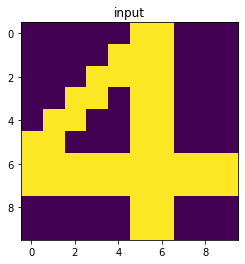

In [7]:
memories_input = [zero,one,two]
w = W_loop(memories_input)
w[np.diag_indices(100)] = 0
w= w/len(memories_input)

print(w)


sin = generator(four)
plt.title('input')
plt.imshow(sin)

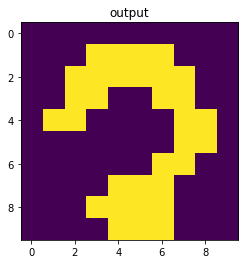

In [8]:
#result.

ret = Hopfield(w, 10, sin)
plt.title('output')
plt.imshow(ret.reshape(10,10))

## **2. Try to input unknown information: a letter.**

In [9]:
def to_pattern(letter):
    return np.array([+1 if c=='X' else -1 for c in letter.replace('\n','')]).reshape(10,10)

def display(pattern):
    plt.imshow(pattern)

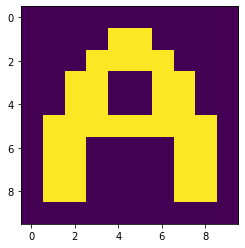

In [10]:
#you can try other letters.

letter = """
..........
....XX....
...XXXX...
..XX..XX..
..XX..XX..
.XXXXXXXX.
.XX....XX.
.XX....XX.
.XX....XX.
..........
"""

display(to_pattern(letter))

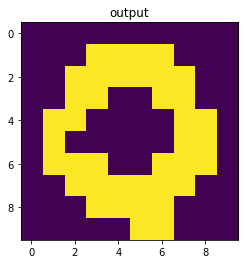

In [11]:
memories_input = [zero,one,two,three,four]
w = W_loop(memories_input)
w[np.diag_indices(100)] = 0
w= w/len(memories_input)

sin = generator(to_pattern(letter))
ret = Hopfield(w, 10, sin)
plt.title('output')
plt.imshow(ret.reshape(10,10))
# plt.colorbar()

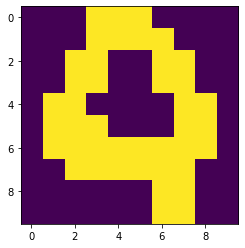

In [12]:
plt.imshow(nine)

## **3. damaged input information.**

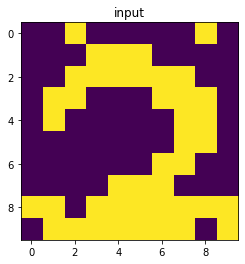

In [15]:
memories_input = [zero,one,two]
w = W_loop(memories_input)
w[np.diag_indices(100)] = 0
w= w/len(memories_input)

sin = generator(two, noise_percentage= 5)
plt.title('input')
plt.imshow(sin)

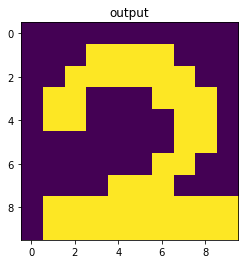

In [16]:
#result
ret = Hopfield(w, 100, sin)
plt.title('output')
plt.imshow(ret.reshape(10,10))